<a href="https://colab.research.google.com/github/ChovenDV/voice-command-recognition/blob/main/Borodkin3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import wave
import soundfile as sf
from array import array
#import sys
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy.fft import fft, ifft

In [ ]:
import librosa.core as core
import librosa.feature as ftr
import librosa.sequence as seq

import timeit

import scipy as sc
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
# import fastdtw as fd

import sys
import os
import random as rnd

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split


# from tensorflow.keras import layers
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization, AveragePooling2D
# from tensorflow.keras.optimizers import SGD, RMSprop, Adam
# # import tensorflow_datasets as tfds  # pip install tensorflow-datasets
import tensorflow as tf
# import logging
#
# from tensorflow.keras.models import Sequential

In [ ]:
#2.1 загрузка речевой информации из файла формата wav

path_to_folder = '/content/drive/MyDrive/Colab Notebooks/Borodkin2/'
filename = 'Chrom.wav'

types = {
    1: np.int8,
    2: np.int16,
    4: np.int32
}
frame_time = 0.01
frame_shift = 0.5
wav = wave.open(path_to_folder+filename, mode="r")
_, sampwidth, sr, nframes,_, _ = wav.getparams()
#ампллитуда, частота кадров, количество кадров
content = wav.readframes(nframes)
y = np.frombuffer(content, dtype=types[sampwidth])
print('частота дискретизации:', sr)
print('кол-во отсчетов:',nframes)

частота дискретизации: 44100
кол-во отсчетов: 1050624


In [ ]:
dictionary = ['Chrom', 'Exel', 'FireFox', 'Paint', 'Putty', 'Word', 'Блокнот', 'Календарь', 'Калькулятор', 'Консоль', 'Проводник']

# dictionary = ['Вперед']
path = '/content/drive/MyDrive/Colab Notebooks/Borodkin2/'
files = os.listdir(path)
frame_time = 0.02
frame_shift = 0.0
n_mfcc = 3
dct_type = 2
norm = 'ortho'

In [ ]:

f_ind = 0
all_data = []
dataGraph = []
word_count=[]
for w_ind in range(len(dictionary)):
    filename = dictionary[w_ind]
    w_count = 0
    f_ind_array = []
    for f in range(len(files)):
        if files[f].find(filename) >= 0:

            # fname = path + filename + ".wav"
            fname = path + files[f]
            y_int, sr = sf.read(file=fname, dtype='int16')

            # print(y_int[0:441])
            y = [0] * len(y_int)
            for i in range(len(y_int)):
                y[i] = float(y_int[i])

            y = np.array(y_int, dtype='float32')
            frameWidth = int(frame_time * sr)
            frameShift = int(frame_shift * frameWidth)
            df = frameWidth - frameShift
            frameCount = int(len(y) / df) - 1
            # frameCount2 = int(len(y) / frameWidth)
            frameCount2 = int(frameWidth / df) * (int(len(y) / frameWidth) - 1) + 1

            wnd = np.hanning(frameWidth)
            # print(frameCount2)
            # print(fname)
            # print(len(y))
            sh = 0

            Mfccs = ftr.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, hop_length=df, win_length=frameWidth, window=wnd, dct_type=dct_type)

            Mfccs = Mfccs.ravel(order='F')
            # Mfccs.reshape((1,(frameCount2 +1)* n_mfcc))

            # plt.plot(Mfccs)
            # plt.show()
            # # print(Mfccs)
            # sys.exit(-1)

            S = core.power_to_db(ftr.melspectrogram(y=y, sr=sr, hop_length=len(y) + 1, win_length=frameWidth, window=wnd))
            M = sc.fftpack.dct(S, axis=0, type=dct_type, norm=norm)[:n_mfcc]
            all_data.append({'n': w_ind,'filename':filename,'fname':fname,'mfccs_fr':Mfccs, 'mfcc': M.ravel()[2:n_mfcc]})


            if (w_count == 0):
                dataGraph.append({'n': w_ind,'filename':filename,'fname':fname,'mfccs_fr':Mfccs, 'mfcc': M.ravel()[2:n_mfcc]})

            f_ind_array.append(f_ind)
            f_ind += 1
            w_count += 1

    word_count.append({'fcount': w_count, 'findexes':f_ind_array})


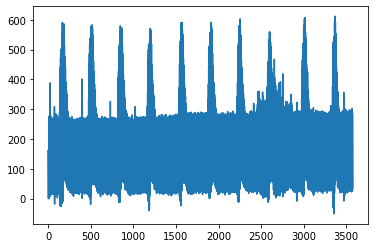

In [ ]:

plt.figure()
for k in range(1):
    plt.plot(dataGraph[k]['mfccs_fr'])



In [ ]:

# sys.exit(-1)

mfcc_count = 0
for f_ind in range(len(all_data)):
    if len(all_data[f_ind]['mfccs_fr']) > mfcc_count:
        mfcc_count = len(all_data[f_ind]['mfccs_fr'])
data = np.ndarray(shape=[len(all_data), mfcc_count])

labels = np.ndarray(shape=[len(all_data), 1])
for i in range(len(data)):
    labels[i] = all_data[i]['n']
    for j in range(len(all_data[i]['mfccs_fr'])):
        data[i,j] = all_data[i]['mfccs_fr'][j]


In [ ]:
s = 'aafaaa'
print(s.rfind('f'))

2


In [ ]:
s = 'In {0}, someone paid {1}{2} for two pizzas.'
year = 2010
price = 10
num = 'k'
print(s.format(year, price, num))

In 2010, someone paid 10k for two pizzas.


In [ ]:
chars = [c for c in 'abcdefg']
print(chars)

['a', 'b', 'c', 'd', 'e', 'f', 'g']
